# Train NN using MNIST dataset
Let's learn through doing.

This notebook is a simple example of how to train a neural network using the MNIST dataset. The notebook is divided into three parts:
1. Pytorch Dataset
2. Pytorch Model
3. Pytorch Training Loop

Almost every pytorch model training pipeline meets this paradigm.

In [7]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

# Step 1. Pytorch Dataset and Dataloader

- Datasets provide and organized way to structure how the data and labels are loaded into the model.
- We can then wrap the dataset in a dataloader and pytorch will handle batching the shuffling the data for us when training the model!

In [8]:
# MNIST dataset 
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),  
                               download=True)

test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())

# Data loader
# - It's faster to train the model in batches instead of one at a time.
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=64, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=64, 
                         shuffle=False)

In [9]:
# Checking the dataset length
print("Length of train dataset: ", len(train_dataset))
print("Length of test dataset: ", len(test_dataset))

Length of train dataset:  60000
Length of test dataset:  10000


In [10]:
x_image, y_label = train_dataset[6000]
print("label:", y_label)
print("image.shape:", x_image.shape)
print("image tensor:", x_image)


label: 6
image.shape: torch.Size([1, 28, 28])
image tensor: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.000

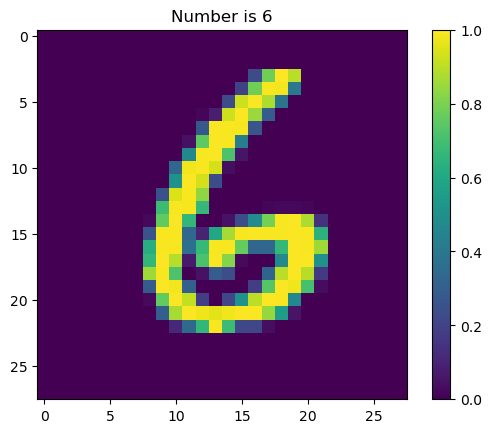

In [11]:
def display_image(image, label):
    plt.imshow( image.permute(1, 2, 0) )
    plt.title(f'Number is {label}')
    plt.colorbar()
    plt.show()

display_image(x_image, y_label)

In [12]:
for images, labels in train_loader:
    break

In [13]:
images.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [14]:
labels

tensor([1, 8, 7, 7, 1, 4, 7, 8, 1, 3, 7, 2, 8, 5, 8, 1, 1, 3, 2, 1, 6, 0, 3, 1,
        3, 7, 3, 2, 5, 1, 3, 2, 1, 1, 2, 4, 2, 5, 7, 6, 7, 0, 9, 5, 1, 5, 3, 0,
        0, 5, 9, 8, 9, 8, 9, 7, 7, 9, 0, 9, 6, 2, 5, 5])

# Step 2. Pytorch Model


In [15]:
# Fully connected neural network with one hidden layer
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__() # instantiate our nn.Module
        self.l1 = nn.Linear(784, 500) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(500, 500) 
        self.sigmoid = nn.Sigmoid()
        self.l3 = nn.Linear(500, 10)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.sigmoid(out)
        out = self.l3(out)
        # no activation and no softmax at the end
        return out


# Step 3. The training loop

- Terms:
    - Epoch: One run through the entire training dataset.
    - Step: One batch of data as defined in our dataloader
- The training loop loads in data to the model in batches 
- Then calculate the loss and perform backpropagation. 
- Two things to select:
    - optimizer, `SGD` is the best place to start for most tasks.
    - loss function: What the model will optimize for.


In [16]:
classifier_model = ImageClassifier()

# Loss and optimizer
lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier_model.parameters(), lr=0.001)  

# Train the model
n_total_steps = len(train_loader)
num_epochs = 3

In [17]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # The images are currently 28x28, but we want to turn the images 
        # into a vector having a length of 28*28 (or 784 in total length)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = classifier_model(images)
        loss = lossfun(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/3], Step [100/938], Loss: 0.4662
Epoch [1/3], Step [200/938], Loss: 0.4215
Epoch [1/3], Step [300/938], Loss: 0.4925
Epoch [1/3], Step [400/938], Loss: 0.1877
Epoch [1/3], Step [500/938], Loss: 0.1478
Epoch [1/3], Step [600/938], Loss: 0.3397
Epoch [1/3], Step [700/938], Loss: 0.1333
Epoch [1/3], Step [800/938], Loss: 0.0762
Epoch [1/3], Step [900/938], Loss: 0.0776
Epoch [2/3], Step [100/938], Loss: 0.1440
Epoch [2/3], Step [200/938], Loss: 0.0260
Epoch [2/3], Step [300/938], Loss: 0.0730
Epoch [2/3], Step [400/938], Loss: 0.0348
Epoch [2/3], Step [500/938], Loss: 0.0830
Epoch [2/3], Step [600/938], Loss: 0.0202
Epoch [2/3], Step [700/938], Loss: 0.0379
Epoch [2/3], Step [800/938], Loss: 0.0796
Epoch [2/3], Step [900/938], Loss: 0.0302
Epoch [3/3], Step [100/938], Loss: 0.0503
Epoch [3/3], Step [200/938], Loss: 0.0571
Epoch [3/3], Step [300/938], Loss: 0.0686
Epoch [3/3], Step [400/938], Loss: 0.0315
Epoch [3/3], Step [500/938], Loss: 0.0863
Epoch [3/3], Step [600/938], Loss:

label 7
image.shape torch.Size([1, 28, 28])


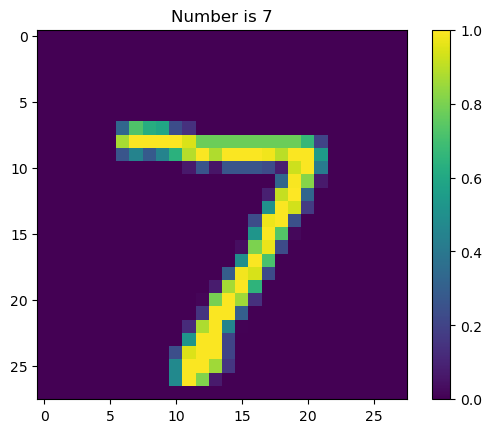

In [18]:
x_sample = test_dataset[0]
x_image, y_label = x_sample
print("label", y_label)
print("image.shape", x_image.shape)
display_image(x_image, y_label)

In [19]:
# Use the trained model to predict the label of this image
yhat_sample = classifier_model(x_image.reshape(-1, 28*28))
yhat_sample

tensor([[ -5.9581,  -2.2891,  -1.5830,   1.8519,  -7.5342,  -1.9515, -12.3078,
           7.9276,  -2.8514,  -0.8507]], grad_fn=<AddmmBackward0>)

In [20]:
# Get the predicted digit using the index of the maximum value
index = torch.argmax(yhat_sample)
predicted_digit = index.item()
print("Predicted digit:", predicted_digit)

Predicted digit: 7


In [21]:
# Test the model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)

        outputs = classifier_model(images)

        # value: actual number, index: predicted number
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        #display_image(images[0].reshape(1, 28, 28), predicted[0])

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the NN on the {len(test_dataset)} test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.61 %


# Evaluating the Results



In [22]:
# Predict using the model
def predict(model, image_tensor):
    model.eval()
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.numpy().flatten()

# Visualization
def visualize_predictions(image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(10, 6))

    # Display image
    axarr[0].imshow(image.permute(1, 2, 0))
    axarr[0].axis("off")

    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

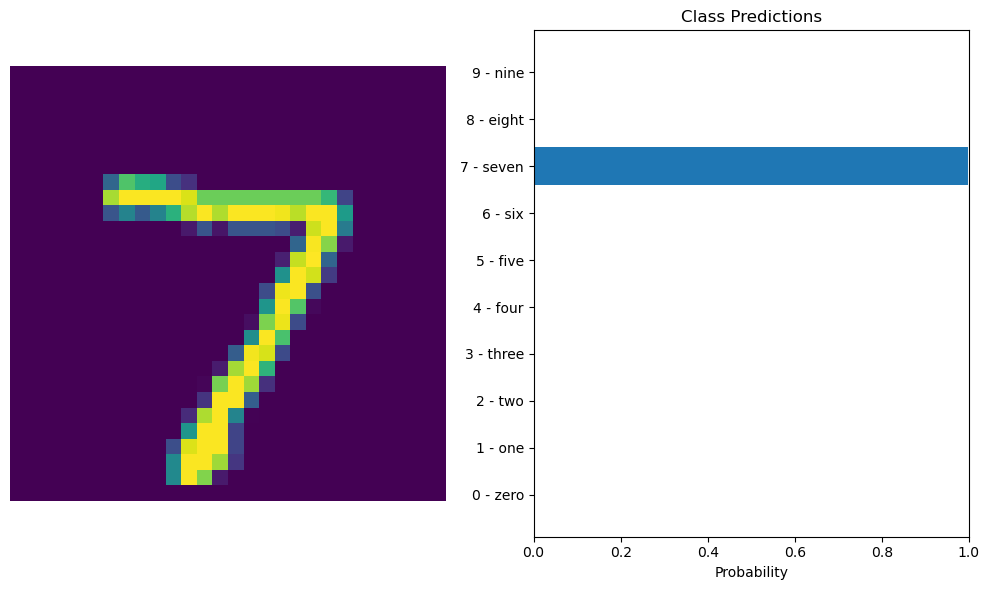

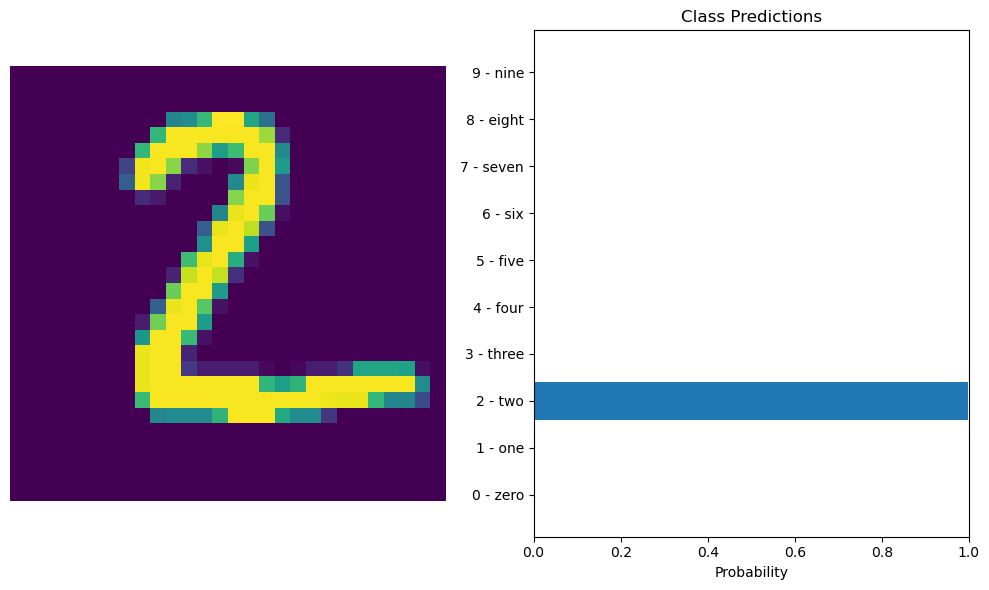

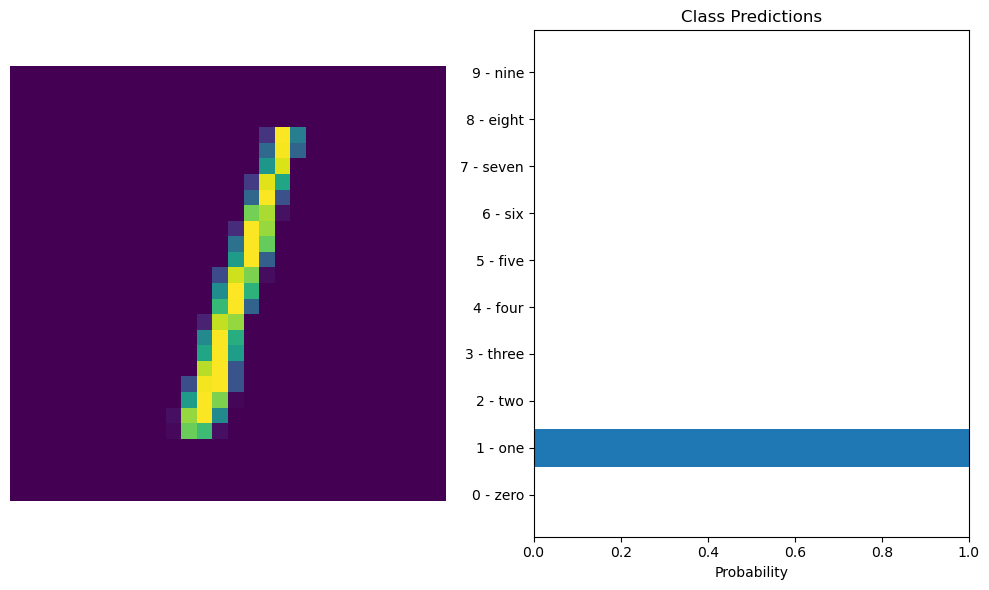

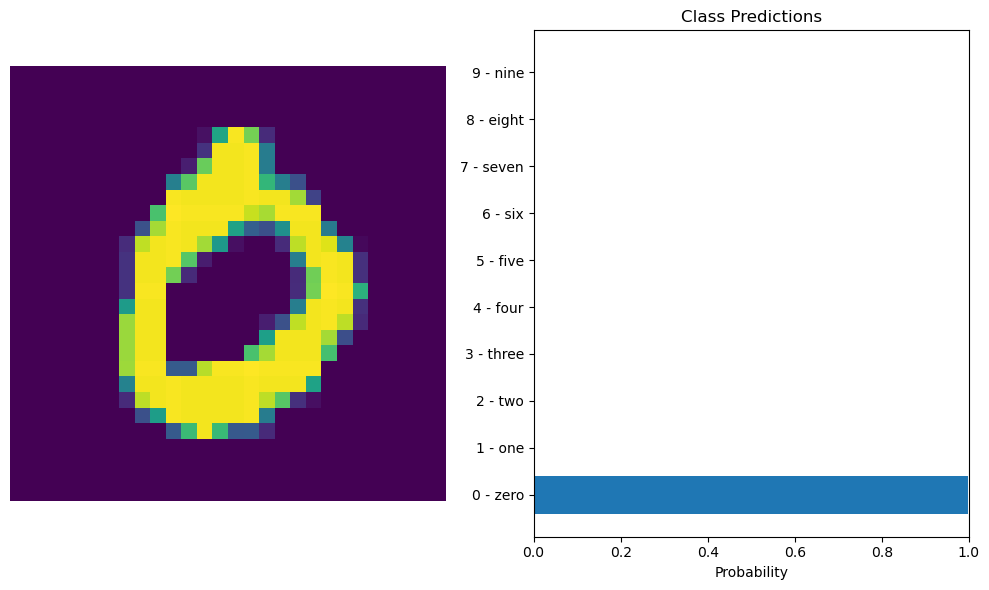

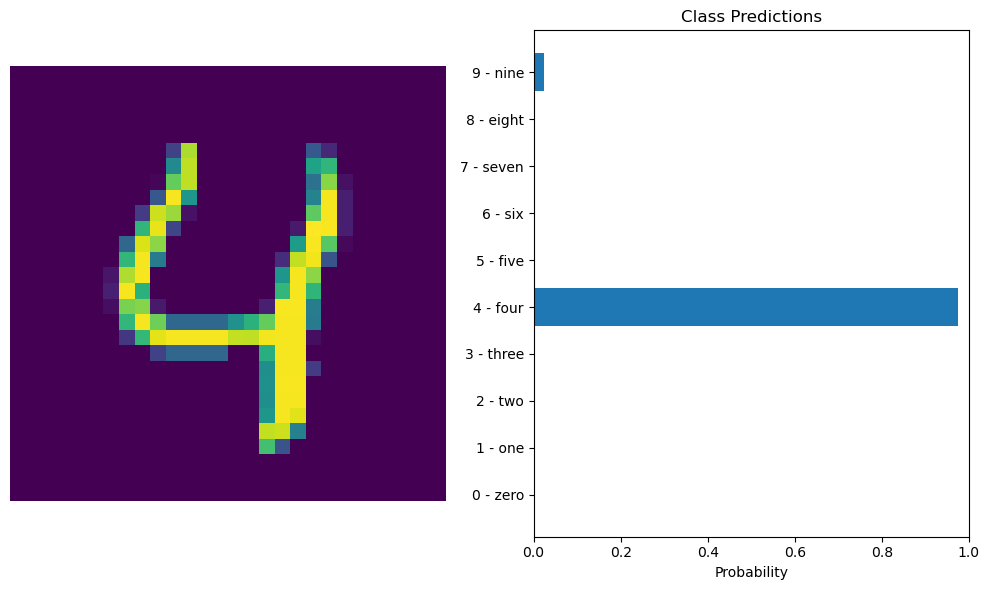

In [23]:
# Test 5 images
for images, labels in test_loader:
    for img in images[:5]:
        probabilities = predict(classifier_model, img.reshape(-1, 28*28))
        class_names = train_dataset.classes
        visualize_predictions(img, probabilities, class_names)
        
    break